<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](./data/mountain/art1131.jpg)|![](./data/forest/cdmc317.jpg)|

The problem is realively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several differnet possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = res.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

## Load in Data

![skimage-logo](https://scikit-image.org/_static/img/logo.png)

Check out out [`skimage`](https://scikit-image.org/) for useful functions related to processing the images. In particular checkout the documentation for `skimage.io.imread_collection` and `skimage.transform.resize`.

In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray

forest_files = ['./data/forest/'+filename for filename in os.listdir('./data/forest/') if filename.endswith('.jpg')]
mountain_files = ['./data/mountain/'+filename for filename in os.listdir('./data/mountain/') if filename.endswith('.jpg')]

forest = np.asarray([imread(filename) for filename in forest_files])
mountain = np.asarray([imread(filename) for filename in mountain_files])

In [31]:
forest.shape, mountain.shape

((328, 256, 256, 3), (374, 256, 256, 3))

In [32]:
X = np.vstack((forest, mountain))

y =np.hstack((np.zeros(len(forest)), np.ones(len(mountain))))

X.shape, y.shape

((702, 256, 256, 3), (702,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(561, 256, 256, 3) (141, 256, 256, 3)
(561,) (141,)


In [34]:
# normalize images

X_train = X_train / 255
X_test = X_test / 255

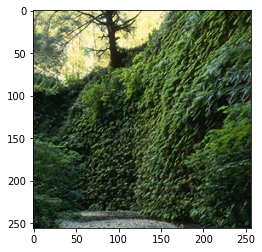

In [35]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])

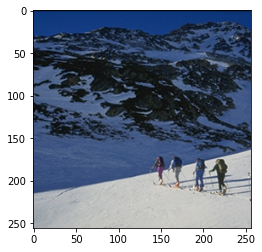

In [36]:
plt.imshow(X_train[5])

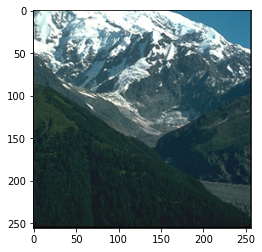

In [37]:
plt.imshow(X_test[3])

In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [39]:
def load_and_preprocess_image(filename):
  img = image.load_img(filename, target_size=(256, 256))
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  img = np.squeeze(img)
  return img

In [40]:
forest_resnet = np.asarray([load_and_preprocess_image(filename) for filename in forest_files])
mountain_resnet = np.asarray([load_and_preprocess_image(filename) for filename in mountain_files])

print('forest shape', forest_resnet.shape)
print('mountain shape', mountain_resnet.shape)

forest shape (328, 256, 256, 3)
mountain shape (374, 256, 256, 3)


In [42]:
X_resnet = np.vstack((forest_resnet, mountain_resnet))
X_resnet.shape, y.shape

((702, 256, 256, 3), (702,))

In [43]:
X_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_test_split(X_resnet, y, test_size=0.2, random_state=42, stratify=y)

print(X_resnet_train.shape, X_resnet_test.shape)
print(y_resnet_train.shape, y_resnet_test.shape)

(561, 256, 256, 3) (141, 256, 256, 3)
(561,) (141,)


## Instatiate Model

In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API
 
resnet = ResNet50(weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 14s 0us/step


In [45]:
for layer in resnet.layers:
    layer.trainable = False

In [46]:
x = resnet.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

In [47]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

## Fit Model

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_accuracy', min_delta=.001, patience=5, restore_best_weights=True)

In [49]:
results = model.fit(X_resnet_train,
                    y_resnet_train, epochs=10, validation_data=(X_resnet_test, y_resnet_test), callbacks=[stop])

Train on 561 samples, validate on 141 samples
Epoch 1/10
561/561 [==============================] - 133s 237ms/sample - loss: 0.6639 - accuracy: 0.8770 - val_loss: 0.0456 - val_accuracy: 0.9787
Epoch 2/10
561/561 [==============================] - 114s 203ms/sample - loss: 0.1076 - accuracy: 0.9501 - val_loss: 0.0718 - val_accuracy: 0.9716
Epoch 3/10
561/561 [==============================] - 133s 237ms/sample - loss: 0.0169 - accuracy: 0.9982 - val_loss: 0.0937 - val_accuracy: 0.9716
Epoch 4/10
561/561 [==============================] - 152s 271ms/sample - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0596 - val_accuracy: 0.9787
Epoch 5/10
561/561 [==============================] - 127s 226ms/sample - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0625 - val_accuracy: 0.9787
Epoch 6/10
561/561 [==============================] - 127s 226ms/sample - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.1794 - val_accuracy: 0.9291


In [50]:
model.evaluate(X_resnet_test, y_resnet_test)

141/141 [==============================] - 19s 132ms/sample - loss: 0.0456 - accuracy: 0.9787


[0.0456465999760949, 0.9787234]

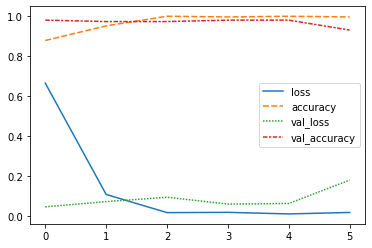

In [53]:
import pandas as pd
import seaborn as sns

sns.lineplot(data=pd.DataFrame(results.history));

In [54]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1000000)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               128000128 
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [56]:
# Compile Model
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Fit Model
results = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[stop])

Train on 561 samples, validate on 141 samples
Epoch 1/20
561/561 [==============================] - 139s 248ms/sample - loss: 0.6928 - accuracy: 0.4884 - val_loss: 0.6947 - val_accuracy: 0.4681
Epoch 2/20
561/561 [==============================] - 126s 224ms/sample - loss: 0.6948 - accuracy: 0.4706 - val_loss: 0.6941 - val_accuracy: 0.4681
Epoch 3/20
561/561 [==============================] - 131s 233ms/sample - loss: 0.6938 - accuracy: 0.4848 - val_loss: 0.6935 - val_accuracy: 0.4681
Epoch 4/20
561/561 [==============================] - 125s 223ms/sample - loss: 0.6936 - accuracy: 0.4688 - val_loss: 0.6930 - val_accuracy: 0.5319
Epoch 5/20
561/561 [==============================] - 130s 231ms/sample - loss: 0.6928 - accuracy: 0.5152 - val_loss: 0.6927 - val_accuracy: 0.5319
Epoch 6/20
561/561 [==============================] - 127s 226ms/sample - loss: 0.6925 - accuracy: 0.5330 - val_loss: 0.6924 - val_accuracy: 0.5319
Epoch 7/20
561/561 [==============================] - 122s 217ms/s

In [58]:
model.evaluate(X_test, y_test)

141/141 [==============================] - 4s 28ms/sample - loss: 0.6930 - accuracy: 0.5319


[0.6930313309033712, 0.5319149]

In [60]:
assert model.evaluate(X_test, y_test) == epochs[20]

141/141 [==============================] - 3s 21ms/sample - loss: 0.6930 - accuracy: 0.5319


NameError: name 'epochs' is not defined

In [ ]:
sns.lineplot(data=pd.DataFrame(results.history));

# Custom CNN Model with Image Manipulations
## *This a stretch goal, and it's relatively difficult*

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 

In [ ]:
# State Code for Image Manipulation Here

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language